# Comportamiento de los clientes de Megaline

El operador de telecomunicaciones Megaline ofrece dos tarifas de prepago; Surf y Ultimate. Como analista de esta empresa debo descubrir cuál de los dos planes genera mayores ingresos con el objetivo de ajustar el presupuesto de publicidad.

**DESCRIPCIÓN DE LAS TARIFAS**

**Surf**
- Pago mensual: 20 dólares
- 500 minutos al mes, 50 SMS y 15 GB de datos
- Si se exceden los límites del paquete:
     - 1 minuto: 3 centavos
     - 1 SMS: 3 centavos
     - 1 GB de datos: 10 dólares

**Ultimate**
- Pago mensual: 70 dólares
- 3000 minutos al mes, 1000 SMS y 30 GB de datos
- Si se exceden los límites del paquete:
     - 1 minuto: 1 centavo
     - 1 SMS: 1 centavo
     - 1 GB de datos: 7 dólares
     
**DESCRIPCIÓN DEL COBRO DE SERVICIO**

- Las llamadas individuales se redondean hacia arriba en minutos
- El tráfico web se redondea mensualmente hacia arriba en gigabytes

**Tabla de contenido**
1. Estudiar los archivos
2. Transformación de datos
3. Prueba de hipótesis
4. Conclusión general

# Estudiar los archivos

In [1]:
#importación de paquetes
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import pandas as pd
import numpy as np
import math
from scipy.stats import t
from typing import List
from scipy.stats import ttest_ind

In [2]:
#creando las variables con los df
try:
    calls = pd.read_csv("/datasets/megaline_calls.csv")
except:
    calls = pd.read_csv("megaline_calls.csv")

In [3]:
try:
    internet = pd.read_csv("/datasets/megaline_internet.csv")
except:
    internet = pd.read_csv("megaline_internet.csv")

In [4]:
try:
    messages = pd.read_csv("/datasets/megaline_messages.csv")
except:
    messages = pd.read_csv("megaline_messages.csv")

In [5]:
try:
    plans = pd.read_csv("/datasets/megaline_plans.csv")
except:
    plans = pd.read_csv("megaline_plans.csv")

In [6]:
try:
    users = pd.read_csv("/datasets/megaline_users.csv")
except:
    users = pd.read_csv("megaline_users.csv")

In [7]:
#mostrando el dataset
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [8]:
#mostrando el tipo de datos
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
#mostrando el dataset
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [10]:
#mostrando el tipo de datos
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
#mostrando el dataset
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [12]:
#mostrando el tipo de datos
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
#mostrando el dataset
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [14]:
#mostrando el tipo de datos
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [15]:
#mostrando el dataset
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [16]:
#mostrando el tipo de datos
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**calls**
- Cambiar tipo de dato de "call_date" a fecha

**internet**
- Cambiar tipo de dato de "session_date" a fecha

**messages**
- Cambiar tipo de dato de "message_date" a fecha

**users**
- Tiene datos faltantes en "churn_date", pero son por que el usuario aún usaba el plan cuando se extrajeron los datos
- Cambiar tipo de dato de "reg_date" y de "churn_date" a fecha

# Transformación de datos

In [17]:
#cambiando todas las columnas con fechas a tipo date
calls["call_date"] = pd.to_datetime(calls["call_date"], format = "%Y-%m-%d")
internet["session_date"] = pd.to_datetime(internet["session_date"], format = "%Y-%m-%d")
messages["message_date"] = pd.to_datetime(messages["message_date"], format = "%Y-%m-%d")
users["reg_date"] = pd.to_datetime(users["reg_date"], format = "%Y-%m-%d")
users["churn_date"] = pd.to_datetime(users["churn_date"], format = "%Y-%m-%d")

In [18]:
def get_unique(df):
    for i in df:
        print(i)
        print(df[i].unique())
        print("   ")

In [19]:
get_unique(calls)

id
['1000_93' '1000_145' '1000_247' ... '1499_201' '1499_202' '1499_203']
   
user_id
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1026 1027 1028
 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042
 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056
 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070
 1071 1072 1073 1074 1075 1076 1077 1078 1079 1081 1082 1083 1084 1085
 1086 1087 1088 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100
 1101 1102 1103 1104 1105 1106 1107 1109 1110 1111 1112 1113 1114 1115
 1116 1117 1118 1119 1120 1122 1123 1124 1125 1126 1127 1128 1130 1132
 1133 1134 1135 1136 1138 1139 1140 1141 1142 1144 1145 1146 1147 1148
 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162
 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176
 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1

In [20]:
get_unique(internet)

id
['1000_13' '1000_204' '1000_379' ... '1499_217' '1499_218' '1499_219']
   
user_id
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1026 1027 1028
 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042
 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056
 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070
 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084
 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098
 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112
 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126
 1127 1128 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141
 1142 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156
 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170
 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1

In [21]:
get_unique(messages)

id
['1000_125' '1000_160' '1000_223' ... '1497_547' '1497_558' '1497_613']
   
user_id
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1011 1013 1014 1015 1016
 1017 1018 1019 1020 1023 1026 1027 1028 1029 1030 1031 1032 1033 1034
 1035 1036 1037 1038 1039 1043 1044 1045 1046 1047 1051 1052 1053 1054
 1055 1056 1057 1058 1059 1060 1061 1062 1064 1065 1066 1067 1069 1070
 1072 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1086 1087 1088
 1089 1090 1091 1092 1093 1094 1095 1096 1098 1099 1100 1101 1102 1103
 1104 1105 1107 1110 1111 1112 1113 1114 1115 1116 1118 1119 1120 1121
 1122 1123 1124 1125 1126 1127 1128 1130 1131 1132 1133 1134 1136 1137
 1138 1139 1140 1141 1142 1144 1145 1146 1147 1148 1151 1154 1155 1159
 1160 1161 1162 1163 1164 1165 1167 1168 1169 1170 1172 1173 1174 1175
 1176 1177 1178 1179 1180 1181 1182 1183 1184 1186 1187 1188 1189 1190
 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1203 1204 1205
 1206 1207 1209 1211 1212 1213 1214 1215 1218 1219 1220 1221 

In [22]:
get_unique(plans)

messages_included
[  50 1000]
   
mb_per_month_included
[15360 30720]
   
minutes_included
[ 500 3000]
   
usd_monthly_pay
[20 70]
   
usd_per_gb
[10  7]
   
usd_per_message
[0.03 0.01]
   
usd_per_minute
[0.03 0.01]
   
plan_name
['surf' 'ultimate']
   


Los megabytes permitidos por mes deberían ser 15000 y 30000, ya que son 15 GB y 30 GB.

In [23]:
get_unique(users)

user_id
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 119

A simple vista no se encontraron más errores en los datos

In [24]:
#viendo si hay llamadas con duración 0
calls[calls["duration"] == 0.0]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


Estas llamadas no generan ingresos para la empresa, pues como duraron cero segundos, no se cobra, además, mantener estas filas con datos nulos afectará mucho en la media y desviación estándar de los datos. Es por esto que se procederá a eliminar las filas con llamadas de duración = 0

In [25]:
#eliminando las llamadas con duración cero
calls = calls[calls["duration"] != 0.0]

In [26]:
#revisando que se eliminaron
calls[calls["duration"] == 0.0]

,id,user_id,call_date,duration


Para hacer un mejor estudio de los datos buscaremos por usuario:
- Número de llamadas realizadas y minutos utilizados al mes
- La cantidad de los SMS enviados por mes
- Volumen de datos por mes
- Ingresos mensuales de cada usuario (total llamadas - límite del paquete gratuito)*tarifa de llamadas + cargo mensual; eso para llamadas, sms y datos.

In [27]:
#agregando una columna a calls de la duración de la llamada redondeada hacia arriba
calls["rounded_duration"] = np.ceil(calls['duration']).astype("int")
#agregando una columna del mes de cada llamada
calls["month"] = pd.DatetimeIndex(calls["call_date"]).month

In [28]:
#comprobando que se crearon las columnas
calls.head()

,id,user_id,call_date,duration,rounded_duration,month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12


In [29]:
#creando una tabla dinámica del total de duracion de llamadas por usuario y por mes
calls_per_users = calls.pivot_table(index=["user_id", "month"], values="rounded_duration", aggfunc="sum")
calls_per_users.columns = ["total_duration"]
calls_per_users

total_duration
user_id month                
1000    12                124
1001    8                 182
        9                 315
        10                393
        11                426
...                       ...
1498    12                339
1499    9                 346
        10                385
        11                308
        12                496

[2256 rows x 1 columns]

In [30]:
#agregando una columna del mes de cada mensaje
messages["month"] = pd.DatetimeIndex(messages["message_date"]).month
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [31]:
#creando una tabla dinámica de la cantidad de mensajes por usuario y por mes
messages_per_users = messages.pivot_table(index=["user_id", "month"], values="id", aggfunc="count")
messages_per_users.columns = ["total_messages"]
messages_per_users

total_messages
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36
...                       ...
1496    9                  21
        10                 18
        11                 13
        12                 11
1497    12                 50

[1806 rows x 1 columns]

In [32]:
#agregando una columna del mes de cada sesión
internet["month"] = pd.DatetimeIndex(internet["session_date"]).month
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [33]:
#creando una tabla dinámica del volumne de datos por usuario y por mes
internet_per_users = internet.pivot_table(index=["user_id", "month"], values="mb_used", aggfunc="sum")
internet_per_users

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [34]:
#agregando una columna de total de datos mensuales, redondeados en gigabytes
internet_per_users["rounded_gb"] = np.ceil(internet_per_users["mb_used"]/1024).astype("int")
internet_per_users

mb_used  rounded_gb
user_id month                      
1000    12      1901.47           2
1001    8       6919.15           7
        9      13314.82          14
        10     22330.49          22
        11     18504.30          19
...                 ...         ...
1498    12     23137.69          23
1499    9      12984.76          13
        10     19492.43          20
        11     16813.83          17
        12     22059.21          22

[2277 rows x 2 columns]

In [35]:
#creando tabla dinámica con el total de duración de llamadas, mensajes y datos por cliente y por mes
revenue_per_user = calls_per_users.merge(messages_per_users, on = ["user_id", "month"], how="outer")
revenue_per_user = revenue_per_user.merge(internet_per_users, on = ["user_id", "month"], how="outer").drop(["mb_used"], axis=1)
revenue_per_user = revenue_per_user.rename({"rounded_gb": "total_gb"}, axis=1).reset_index()
#agregando a la tabla dinámica el plan elegido
revenue_per_user = revenue_per_user.merge(users, on = ["user_id"], how="outer").drop(["first_name", "last_name", "age", "city", "reg_date", "churn_date"], axis=1)
revenue_per_user

,user_id,month,total_duration,total_messages,total_gb,plan
0,1000,12.0,124.0,11.0,2.0,ultimate
1,1001,8.0,182.0,30.0,7.0,surf
2,1001,9.0,315.0,44.0,14.0,surf
3,1001,10.0,393.0,53.0,22.0,surf
4,1001,11.0,426.0,36.0,19.0,surf
...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,surf
2299,1319,NaN,NaN,NaN,NaN,surf
2300,1378,NaN,NaN,NaN,NaN,surf
2301,1463,NaN,NaN,NaN,NaN,ultimate


In [36]:
#eliminando las filas que no tenían ningun valor en month y rellenando los valores nulos
revenue_per_user = revenue_per_user.dropna(subset=["month"]).fillna(0)
revenue_per_user.head()

,user_id,month,total_duration,total_messages,total_gb,plan
0,1000,12.0,124.0,11.0,2.0,ultimate
1,1001,8.0,182.0,30.0,7.0,surf
2,1001,9.0,315.0,44.0,14.0,surf
3,1001,10.0,393.0,53.0,22.0,surf
4,1001,11.0,426.0,36.0,19.0,surf


In [37]:
#función para calcular los ingresos por cliente por mes
def calculate_revenue(row):
    calls = row["total_duration"]
    messages = row["total_messages"]
    data = row["total_gb"]
    plan = row["plan"]
    
    
    if plan == "surf":
        ind = 0
    else:
        ind = 1
        
    calls_difference = plans["minutes_included"][ind] - calls
    message_difference = plans["messages_included"][ind] - messages
    data_difference = (plans["mb_per_month_included"][ind]/1000) - data
    
    extra_calls = 0
    extra_message = 0
    extra_data = 0

    if calls_difference < 0:
        extra_calls = abs(calls_difference)*plans["usd_per_minute"][ind]
    if message_difference < 0:
        extra_message = abs(message_difference)*plans["usd_per_message"][ind]
    if data_difference < 0:
        extra_data = abs(data_difference)*plans["usd_per_gb"][ind]
        
    revenue = plans["usd_monthly_pay"][ind] + extra_calls + extra_message + extra_data
    return revenue

In [38]:
#aplicando la función para crear la columna de revenue
revenue_per_user["revenue"] = revenue_per_user.apply(calculate_revenue, axis=1)
revenue_per_user.head()

,user_id,month,total_duration,total_messages,total_gb,plan,revenue
0,1000,12.0,124.0,11.0,2.0,ultimate,70.00
1,1001,8.0,182.0,30.0,7.0,surf,20.00
2,1001,9.0,315.0,44.0,14.0,surf,20.00
3,1001,10.0,393.0,53.0,22.0,surf,86.49
4,1001,11.0,426.0,36.0,19.0,surf,56.40


# Análisis de datos

A continuación se describe el comportamiento de los clientes, creando histogramas y calculando las medidas estadísticas para cada tipo de plan.

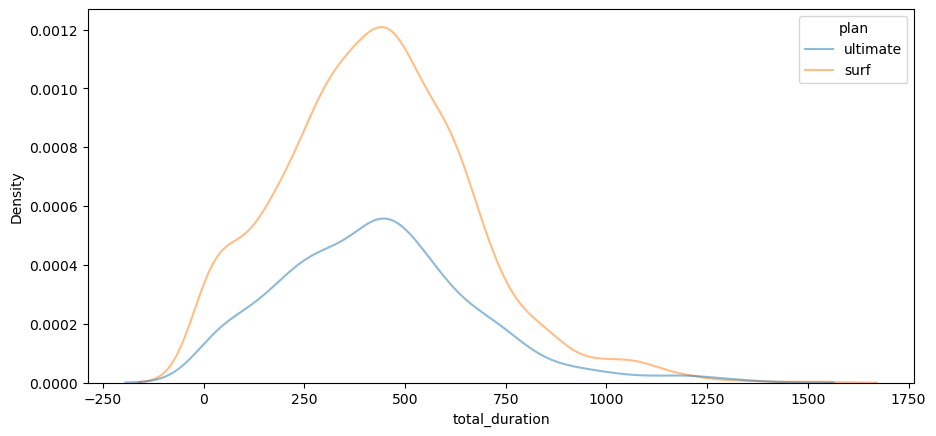

In [39]:
#observando la distribución de probabilidad de la duración de las llamadas
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(data=revenue_per_user, x="total_duration", hue="plan", alpha=0.5, ax=ax)
fig.tight_layout(pad=3.0)

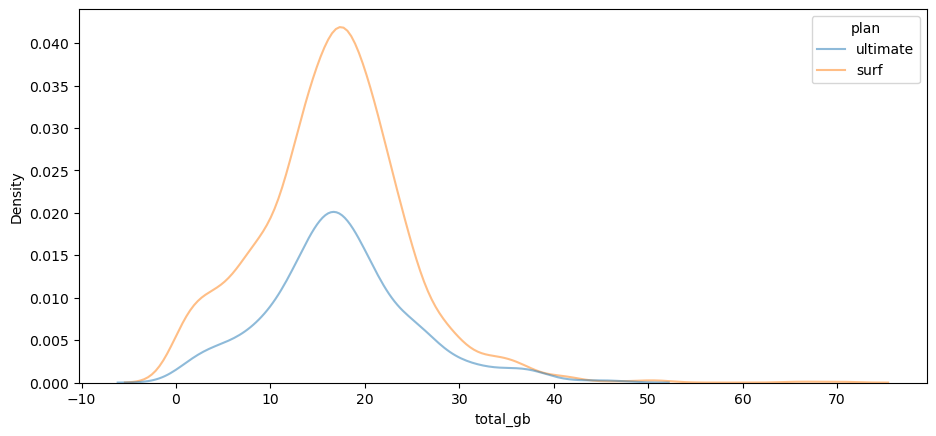

In [40]:
#observando la distribución de probabilidad del uso de datos
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(data=revenue_per_user, x="total_gb", hue="plan", alpha=0.5, ax=ax)
fig.tight_layout(pad=3.0)

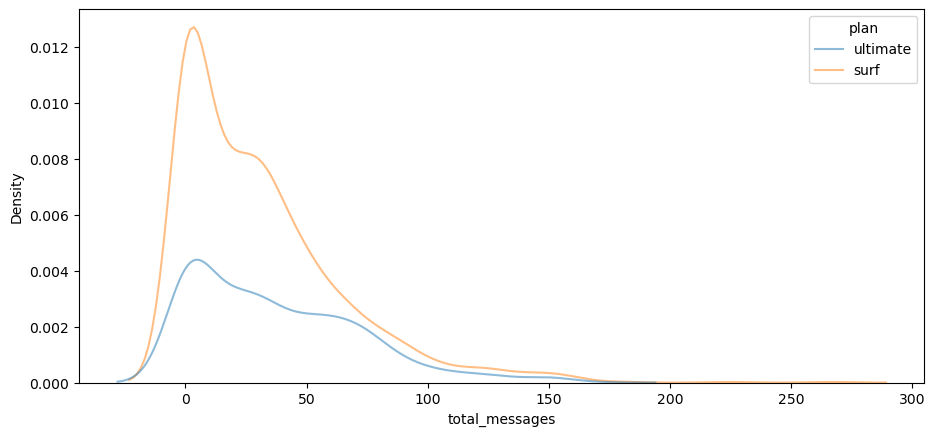

In [41]:
#observando la distribución de probabilidad de la cantidad de mensajes
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(data=revenue_per_user, x="total_messages", hue="plan", alpha=0.5, ax=ax)
fig.tight_layout(pad=3.0)

De los tres gráficos anteriores se puede concluir que las tres variables distribuyen de forma normal.

In [42]:
print("Descripción de la variable 'total_duration'")
print(revenue_per_user["total_duration"].describe())
print("  ")
print("Descripción de la variable 'total_gb'")
print(revenue_per_user["total_gb"].describe())
print("  ")
print("Descripción de la variable 'total_messages'")
print(revenue_per_user["total_messages"].describe())

Descripción de la variable 'total_duration'
count    2293.000000
mean      429.283471
std       236.320077
min         0.000000
25%       265.000000
50%       425.000000
75%       572.000000
max      1510.000000
Name: total_duration, dtype: float64
  
Descripción de la variable 'total_gb'
count    2293.000000
mean       16.870475
std         7.796174
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: total_gb, dtype: float64
  
Descripción de la variable 'total_messages'
count    2293.000000
mean       33.166594
std        34.070085
min         0.000000
25%         3.000000
50%        26.000000
75%        51.000000
max       266.000000
Name: total_messages, dtype: float64


In [43]:
#creando las tablas para obtener los datos separados por plan
surf_plan = revenue_per_user.query('plan == "surf"').pivot_table(index="month", values=["total_duration", "total_messages", "total_gb"], aggfunc="sum").reset_index()
ultimate_plan = revenue_per_user.query('plan == "ultimate"').pivot_table(index="month", values=["total_duration", "total_messages", "total_gb"], aggfunc="sum").reset_index()

#uniendo ambas tablas para poder graficar
per_month = surf_plan.merge(ultimate_plan, on="month", how="outer", suffixes = ("_surf", "_ult"))
per_month.head()

,month,total_duration_surf,total_gb_surf,total_messages_surf,total_duration_ult,total_gb_ult,total_messages_ult
0,1.0,406.0,10.0,21.0,774.0,29.0,62.0
1,2.0,2673.0,110.0,108.0,2822.0,121.0,151.0
2,3.0,7590.0,312.0,351.0,3651.0,221.0,243.0
3,4.0,17577.0,611.0,870.0,7074.0,343.0,463.0
4,5.0,30768.0,1087.0,1849.0,11781.0,489.0,931.0


<AxesSubplot:title={'center':'Duración de llamadas mensuales por plan'}, xlabel='month'>

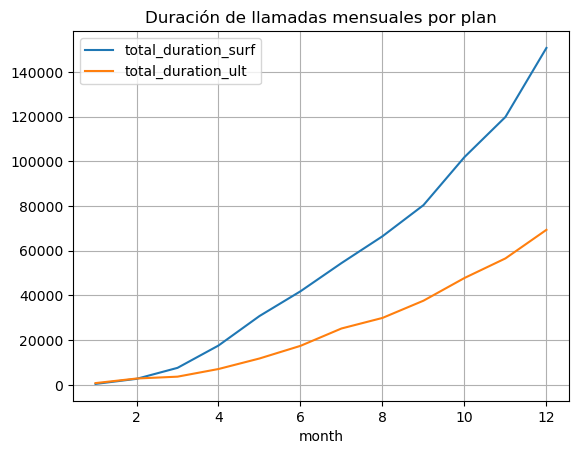

In [44]:
#graficando el total de llamadas, mensajes y gigas para comparar los planes
per_month.plot(title="Duración de llamadas mensuales por plan", x="month", y=["total_duration_surf", "total_duration_ult"], grid=True)

In [45]:
#calculando media mensual por plan
calls_mean_surf = per_month["total_duration_surf"].mean()
calls_mean_ult = per_month["total_duration_ult"].mean()

print("Con el plan surf se utilizan en total", round(calls_mean_surf, 2), "minutos al mes")
print("Con el plan ultimate se utilizan en total", round(calls_mean_ult, 2), "minutos al mes")

Con el plan surf se utilizan en total 56201.92 minutos al mes
Con el plan ultimate se utilizan en total 25827.0 minutos al mes


In [46]:
#calculando media por plan
calls_user_mean_surf = revenue_per_user.query('plan == "surf"')["total_duration"].mean()
calls_user_mean_ult = revenue_per_user.query('plan == "ultimate"')["total_duration"].mean()

print("Con el plan surf, una persona llama en promedio:", round(calls_user_mean_surf, 2), "minutos al mes")
print("Con el plan ultimate, una persona llama en promedio:", round(calls_user_mean_ult, 2), "minutos al mes")
print(" ")

calls_user_var_surf = np.var(revenue_per_user.query('plan == "surf"')["total_duration"])
calls_user_var_ult = np.var(revenue_per_user.query('plan == "ultimate"')["total_duration"])

print("La varianza de los minutos plan surf es:", round(calls_user_var_surf, 2))
print("La varianza de los minutos del plan ultimate es:", round(calls_user_var_ult, 2))
print(" ")

calls_user_desv_surf = np.sqrt(calls_user_var_surf)
calls_user_desv_ult = np.sqrt(calls_user_var_ult)

print("La desviación de los minutos del plan surf es:", round(calls_user_desv_surf, 2))
print("La desviación de los minutos del plan ultimate es:", round(calls_user_desv_ult, 2))


Con el plan surf, una persona llama en promedio: 428.75 minutos al mes
Con el plan ultimate, una persona llama en promedio: 430.45 minutos al mes
 
La varianza de los minutos plan surf es: 54933.33
La varianza de los minutos del plan ultimate es: 57764.13
 
La desviación de los minutos del plan surf es: 234.38
La desviación de los minutos del plan ultimate es: 240.34


<AxesSubplot:title={'center':'Cantidad de datos mensuales usados por plan'}, xlabel='month'>

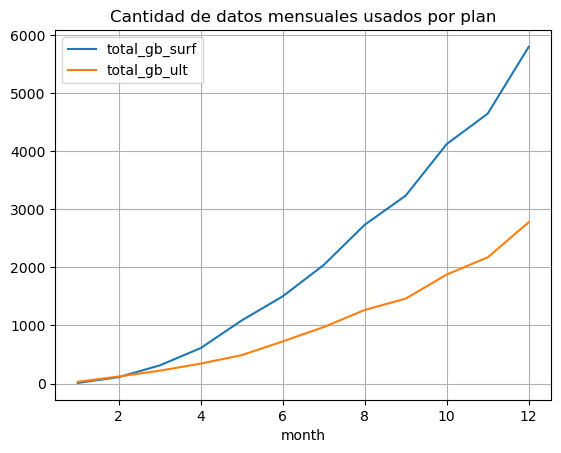

In [47]:
#graficando el total de llamadas, mensajes y gigas para comparar los planes
per_month.plot(title="Cantidad de datos mensuales usados por plan", x="month", y=["total_gb_surf", "total_gb_ult"], grid=True)

In [48]:
#calculando media mensual por plan
data_mean_surf = per_month["total_gb_surf"].mean()
data_mean_ult = per_month["total_gb_ult"].mean()

print("Con el plan surf se usan mensualmente", round(data_mean_surf, 2), "GB en total")
print("Con el plan ultimate se usan mensualmente", round(data_mean_ult, 2), "GB en total")

Con el plan surf se usan mensualmente 2185.25 GB en total
Con el plan ultimate se usan mensualmente 1038.42 GB en total


In [49]:
#calculando media por plan
data_user_mean_surf = revenue_per_user.query('plan == "surf"')["total_gb"].mean()
data_user_mean_ult = revenue_per_user.query('plan == "ultimate"')["total_gb"].mean()

print("Con el plan surf, los usuarios usan en promedio", round(data_user_mean_surf, 2), "GB al mes")
print("Con el plan ultimate, los usuarios usan en promedio", round(data_user_mean_ult, 2), "GB al mes")
print(" ")

data_user_var_surf = np.var(revenue_per_user.query('plan == "surf"')["total_gb"])
data_user_var_ult = np.var(revenue_per_user.query('plan == "ultimate"')["total_gb"])

print("La varianza de los datos del plan surf es:", round(data_user_var_surf, 2))
print("La varianza de los datos del plan ultimate es:", round(data_user_var_ult, 2))
print(" ")

data_user_desv_surf = np.sqrt(data_user_var_surf)
data_user_desv_ult = np.sqrt(data_user_var_ult)

print("La desviación de los GB usados del plan surf es:", round(data_user_desv_surf, 2))
print("La desviación de los GB usados del plan ultimate es:", round(data_user_desv_ult, 2))

Con el plan surf, los usuarios usan en promedio 16.67 GB al mes
Con el plan ultimate, los usuarios usan en promedio 17.31 GB al mes
 
La varianza de los datos del plan surf es: 61.54
La varianza de los datos del plan ultimate es: 58.75
 
La desviación de los GB usados del plan surf es: 7.85
La desviación de los GB usados del plan ultimate es: 7.66


<AxesSubplot:title={'center':'Cantidad de mensajes mensuales por plan'}, xlabel='month'>

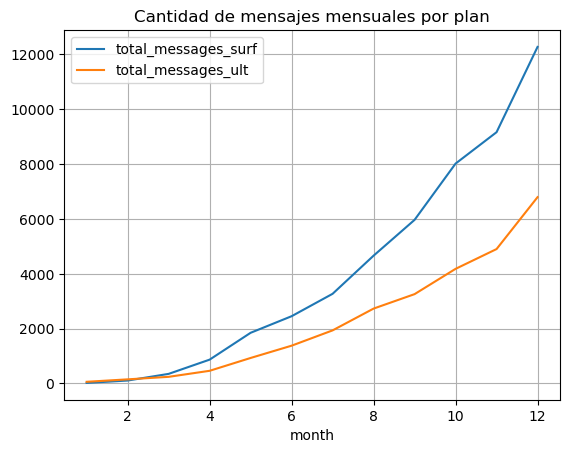

In [50]:
#graficando el total de llamadas, mensajes y gigas para comparar los planes
per_month.plot(title="Cantidad de mensajes mensuales por plan", x="month", y=["total_messages_surf", "total_messages_ult"], grid=True)

In [51]:
#calculando media mensual por plan
message_mean_surf = per_month["total_messages_surf"].mean()
message_mean_ult = per_month["total_messages_ult"].mean()

print("Con el plan surf se envían mensualmente", int(message_mean_surf), "mensajes en total")
print("Con el plan ultimate se envían mensualmente", int(message_mean_ult), "mensajes en total")

Con el plan surf se envían mensualmente 4084 mensajes en total
Con el plan ultimate se envían mensualmente 2253 mensajes en total


In [52]:
#calculando media por plan
messages_user_mean_surf = revenue_per_user.query('plan == "surf"')["total_messages"].mean()
messages_user_mean_ult = revenue_per_user.query('plan == "ultimate"')["total_messages"].mean()

print("Con el plan surf, los usuarios envían en promedio", round(messages_user_mean_surf, 2), "mensajes al mes")
print("Con el plan ultimate, los usuarios envían en promedio", round(messages_user_mean_ult, 2), "mensajes al mes")
print(" ")

messages_user_var_surf = np.var(revenue_per_user.query('plan == "surf"')["total_messages"])
messages_user_var_ult = np.var(revenue_per_user.query('plan == "ultimate"')["total_messages"])

print("La varianza de la cantidad de mensajes del plan surf es:", round(messages_user_var_surf, 2))
print("La varianza de la cantidad de mensajes del plan ultimate es:", round(messages_user_var_ult, 2))
print(" ")

messages_user_desv_surf = np.sqrt(messages_user_var_surf)
messages_user_desv_ult = np.sqrt(messages_user_var_ult)

print("La desviación de la cantidad de mensajes del plan surf es:", round(messages_user_desv_surf, 2))
print("La desviación de la cantidad de mensajes del plan ultimate es:", round(messages_user_desv_ult, 2))

Con el plan surf, los usuarios envían en promedio 31.16 mensajes al mes
Con el plan ultimate, los usuarios envían en promedio 37.55 mensajes al mes
 
La varianza de la cantidad de mensajes del plan surf es: 1126.01
La varianza de la cantidad de mensajes del plan ultimate es: 1207.08
 
La desviación de la cantidad de mensajes del plan surf es: 33.56
La desviación de la cantidad de mensajes del plan ultimate es: 34.74


En general, el promedio mensual es mayor en el plan surf, pero el promedio por persona es mayor en el plan ultimate, esto se debe a que hay muchas más personas en el plan surf.

La desviación estándar es bastante alta

In [53]:
#creando las tablas para obtener los datos separados por plan
surf_plan = revenue_per_user.query('plan == "surf"').pivot_table(index="month", values="revenue", aggfunc="sum").reset_index()
ultimate_plan = revenue_per_user.query('plan == "ultimate"').pivot_table(index="month", values="revenue", aggfunc="sum").reset_index()

#uniendo ambas tablas para poder graficar
revenue_per_month = surf_plan.merge(ultimate_plan, on="month", how="outer", suffixes = ("_surf", "_ult"))

<AxesSubplot:xlabel='month'>

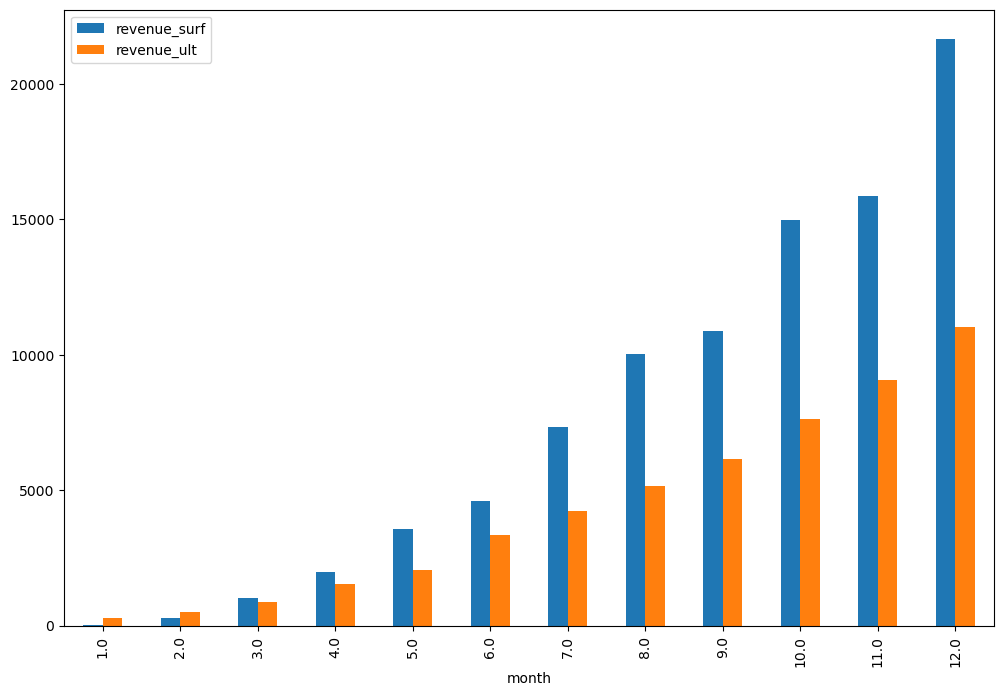

In [54]:
#graficando las ganancias por plan y por mes
revenue_per_month.plot(x="month", y=["revenue_surf", "revenue_ult"], kind="bar",figsize=(12,8))

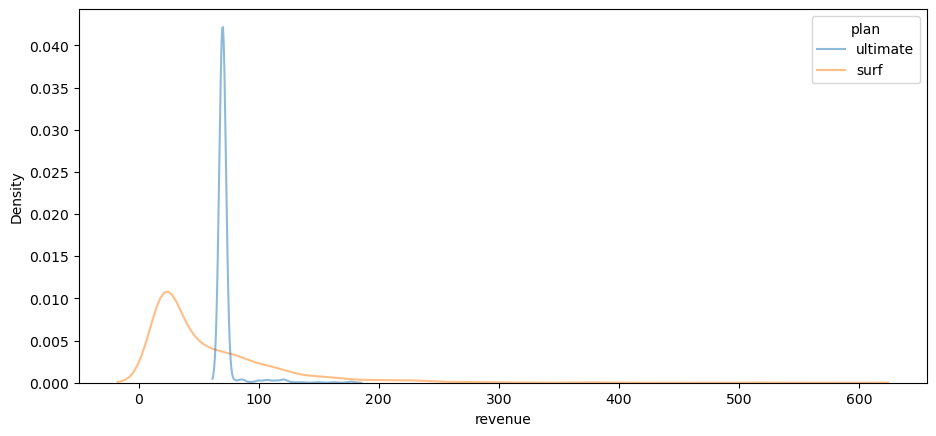

In [55]:
#observando la distribución de probabilidad de la duración de las llamadas
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(data=revenue_per_user, x="revenue", hue="plan", alpha=0.5, ax=ax)
fig.tight_layout(pad=3.0)

Conclusiones a partir de los gráficos

- La cantidad de personas que obtienen un plan aumentan cada mes
- La duración de las llamadas, la cantidad de datos usados y de mensajes enviados es mayor en el plan surf
- El plan surf genera mayores ingresos que el plan ultimate, desde el tercer mes

# Prueba de hipótesis

**Primera hipótesis**

H0 = "El ingreso promedio de los usuarios de las tarifas Ultimate y Surf no difiere"

H1 = "El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere"

Asumiendo que "revenue" distribuye de forma normal, procedemos a graficar el estadístico basado en la distribución normal, es decir la t de student.

In [56]:
def t_density(
    x: List[float],
    df: int=1,
) -> List[float]:
    
    t_pdfs = []
    
    for x_eval in x:
        pdf = t.pdf(x_eval, df)
        
        t_pdfs.append(pdf)
    
    return t_pdfs

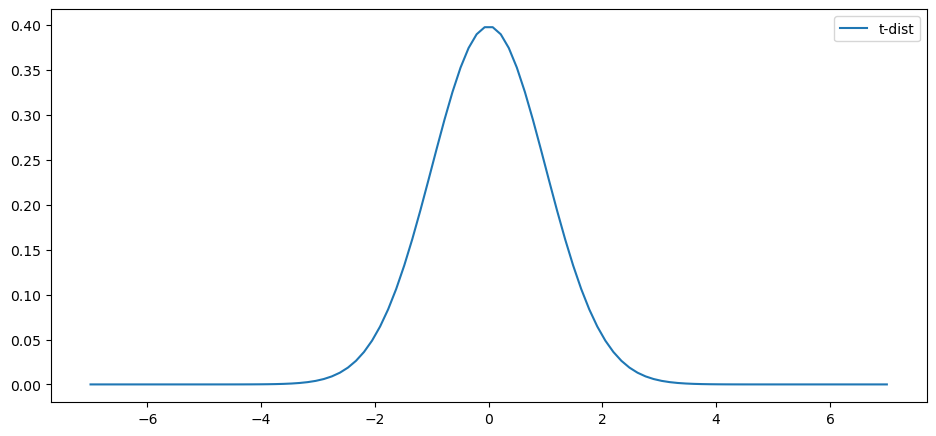

In [57]:
x_revenue = np.linspace(-7,7,100)

#calculando los grados de libertad
n = len(revenue_per_user.loc[revenue_per_user["plan"] == "surf", "revenue"])
m = len(revenue_per_user.loc[revenue_per_user["plan"] == "ultimate", "revenue"])
df_est = n + m - 2

#graficando el estadístico t
pdf_revenue = t_density(x_revenue, df_est)

fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(x=x_revenue, y=pdf_revenue, ax=ax, label="t-dist")

fig.tight_layout(pad=3.0)

Ahora se calcula el estadístico y el p_value, realizando el test de hipótesis para cuando revenue es del plan surf y del plan ultimate.

In [58]:
#calculando el estadístico de la hipótesis y p_value
t_stat, p_value = ttest_ind(
    revenue_per_user.loc[revenue_per_user["plan"] == "surf", "revenue"],
    revenue_per_user.loc[revenue_per_user["plan"] == "ultimate", "revenue"]
)

print(t_stat, p_value)

-6.5645476817662445 6.43460042804159e-11


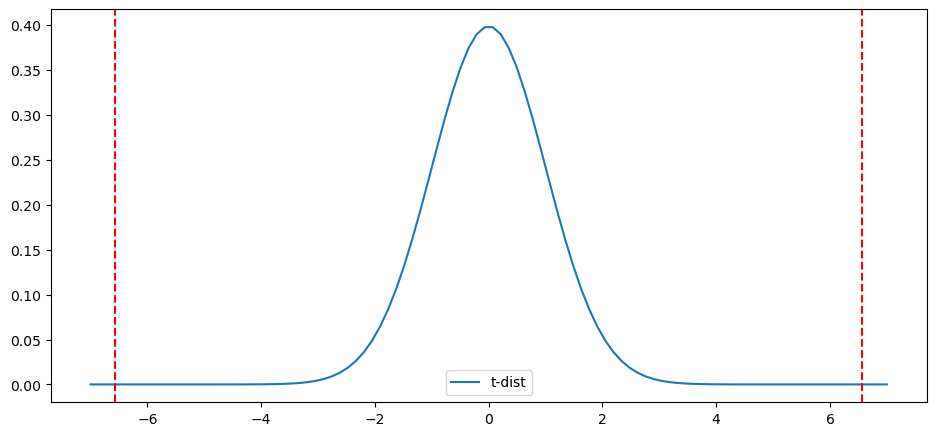

In [59]:
#graficando donde está el estadístico
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=x_revenue, y=pdf_revenue, ax=ax, label="t-dist")
ax.axvline(x=t_stat, color="red", ls="--")
ax.axvline(x=-t_stat, color="red", ls="--")
fig.tight_layout(pad=3.0)

**Conclusión del primer test de hipótesis**

Rechazamos la hipótesis nula, por lo que es probable que la hipótesis alternativa sea real, es decir que es probable que el ingreso promedio de los usuarios de ambos planes difieren.

**Segunda hipótesis**

H0 = el ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es igual al de los usuarios de otras regiones

H1 = el ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones

In [60]:
city_of_user = users[["user_id", "city"]]
city_of_user.head()

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"


In [61]:
revenue_per_user = revenue_per_user.merge(city_of_user, on="user_id")
revenue_per_user.head()

,user_id,month,total_duration,total_messages,total_gb,plan,revenue,city
0,1000,12.0,124.0,11.0,2.0,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,182.0,30.0,7.0,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,315.0,44.0,14.0,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,393.0,53.0,22.0,surf,86.49,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,426.0,36.0,19.0,surf,56.40,"Seattle-Tacoma-Bellevue, WA MSA"


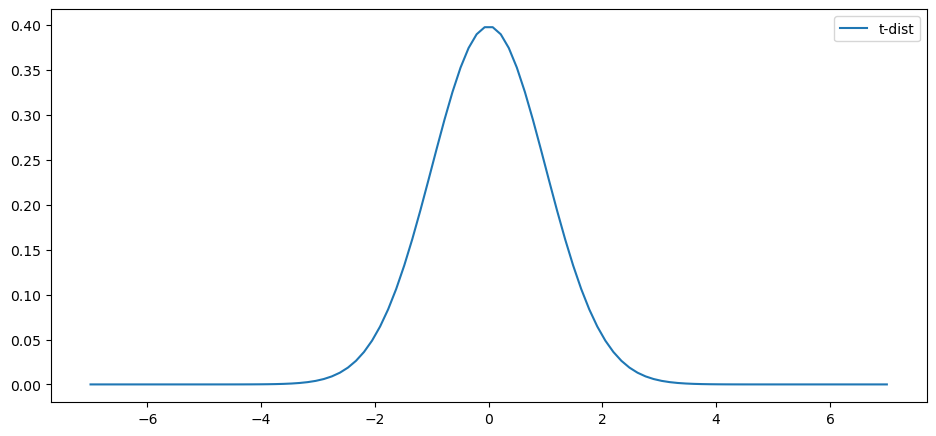

In [62]:
x_revenue = np.linspace(-7,7,100)

#calculando los grados de libertad
n = len(revenue_per_user.loc[revenue_per_user["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA", "revenue"])
m = len(revenue_per_user.loc[revenue_per_user["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA", "revenue"])
df_est = n + m - 2

#graficando el estadístico t
pdf_revenue = t_density(x_revenue, df_est)

fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(x=x_revenue, y=pdf_revenue, ax=ax, label="t-dist")

fig.tight_layout(pad=3.0)

In [63]:
#calculando el estadístico de la hipótesis y p_value
t_stat, p_value = ttest_ind(
    revenue_per_user.loc[revenue_per_user["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA", "revenue"],
    revenue_per_user.loc[revenue_per_user["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA", "revenue"]
)

print(t_stat, p_value)

-2.204176992717235 0.027611004434676133


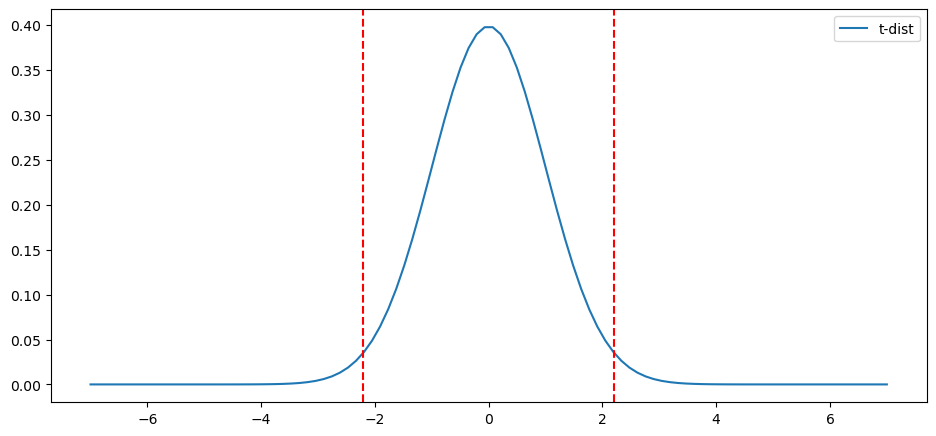

In [64]:
#graficando donde está el estadístico
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=x_revenue, y=pdf_revenue, ax=ax, label="t-dist")
ax.axvline(x=t_stat, color="red", ls="--")
ax.axvline(x=-t_stat, color="red", ls="--")
fig.tight_layout(pad=3.0)

Con un nivel de significancia de 0.01, al observar que p_value es mayor que el nivel de significancia, no existe suficiente evidencia para rechazar la hipótesis nula, es decir que podría ser que "el ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es igual al de los usuarios de otras regiones". 

Ahora, si el nivel de significancia fuera 5%, esta hipótesis se rechazaría. 

# Conclusión general

Se trabajaron las data base iniciales para calcular el ingreso que genera cada usuario mensualmente, y luego con esto se probaron las dos hipótesis que habían.

Con respecto a la primera hipótesis, se rechaza la hipótesis nula que dice que "El ingreso promedio de los usuarios de las tarifas Ultimate y Surf no difiere" con un valor de significancia de 0.05, por lo que es probable que si difieran.

Con respecto a la segunda hipótesis, no se puede rechazar la hipótesis nula que dice que "El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey no es diferente al de los usuarios de otras regiones, con un nivel de significancia del 1%.